<a href="https://colab.research.google.com/github/rindanh/Latihan-NDSC/blob/main/CVD/CVD-Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import time
from tqdm.notebook import tqdm
from sklearn.model_selection import StratifiedKFold

### **Bagi data train test (kalo belum ada pembagian)**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/cardio_train.csv", sep=';')

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['cardio'])
Y = df['cardio']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [ ]:
df_train = pd.concat([X_train, Y_train], axis=1)
df_test = pd.concat([X_test, Y_test], axis=1)

### **Siapin data train test (kalo udah ada pembagian)**

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/sample_submission.csv")

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/archive_9/summer-products-with-rating-and-performance_2020-08.csv")
df_test = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/sample_submission.csv")

In [ ]:
X_train = df_train.drop(columns='Response')
Y_train = df_train.Response

X_test = df_test.copy()

### **Analisis Awal**

In [ ]:
X_train.head().T

,0,1,2,3,4
id,85273.0,14546.0,72084.0,27302.0,47475.0
age,15976.0,18251.0,19692.0,22322.0,15095.0
gender,1.0,2.0,2.0,1.0,1.0
height,150.0,156.0,180.0,168.0,164.0
weight,54.0,70.0,81.0,90.0,93.0
ap_hi,90.0,130.0,120.0,120.0,120.0
ap_lo,60.0,80.0,80.0,80.0,80.0
cholesterol,1.0,1.0,2.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.head().T

,0,1,2,3,4
id,66728.0,69098.0,59185.0,49288.0,62481.0
age,21770.0,21876.0,23270.0,19741.0,18395.0
gender,1.0,1.0,1.0,1.0,1.0
height,156.0,170.0,151.0,159.0,164.0
weight,64.0,85.0,90.0,97.0,68.0
ap_hi,140.0,160.0,130.0,120.0,120.0
ap_lo,80.0,90.0,80.0,80.0,80.0
cholesterol,2.0,1.0,1.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0


In [ ]:
desctrain = X_train.describe().T
desctrain

,count,mean,std,min,25%,50%,75%,max
id,35000.0,49961.782829,28908.131765,2.0,24910.25,50023.5,74988.00,99999.0
age,35000.0,19444.664429,2472.808909,10798.0,17636.75,19690.0,21312.25,23701.0
gender,35000.0,1.349971,0.476967,1.0,1.00,1.0,2.00,2.0
height,35000.0,164.355971,8.238502,60.0,159.00,165.0,170.00,250.0
weight,35000.0,74.155287,14.328055,22.0,65.00,72.0,82.00,200.0
ap_hi,35000.0,129.338314,177.043422,-120.0,120.00,120.0,140.00,14020.0
ap_lo,35000.0,96.900086,199.812157,0.0,80.00,80.0,90.00,11000.0
cholesterol,35000.0,1.365029,0.677745,1.0,1.00,1.0,2.00,3.0
gluc,35000.0,1.223029,0.568089,1.0,1.00,1.0,1.00,3.0
smoke,35000.0,0.089657,0.285694,0.0,0.00,0.0,0.00,1.0


In [ ]:
desctest = X_test.describe().T
desctest

,count,mean,std,min,25%,50%,75%,max
id,35000.0,49983.056971,28794.769777,0.0,25085.50,49980.5,74797.75,99993.0
age,35000.0,19493.067200,2461.479262,14275.0,17699.25,19716.0,21343.00,23713.0
gender,35000.0,1.349171,0.476715,1.0,1.00,1.0,2.00,2.0
height,35000.0,164.362486,8.181769,55.0,159.00,165.0,170.00,207.0
weight,35000.0,74.256093,14.463170,10.0,65.00,72.0,82.00,183.0
ap_hi,35000.0,128.296257,126.865268,-150.0,120.00,120.0,140.00,16020.0
ap_lo,35000.0,96.360743,176.407939,-70.0,80.00,80.0,90.00,10000.0
cholesterol,35000.0,1.368714,0.682751,1.0,1.00,1.0,2.00,3.0
gluc,35000.0,1.229886,0.576409,1.0,1.00,1.0,1.00,3.0
smoke,35000.0,0.086600,0.281252,0.0,0.00,0.0,0.00,1.0


In [ ]:
(desctrain - desctest).astype(int)

,count,mean,std,min,25%,50%,75%,max
id,0,-21,113,2,-175,43,190,6
age,0,-48,11,-3477,-62,-26,-30,-12
gender,0,0,0,0,0,0,0,0
height,0,0,0,5,0,0,0,43
weight,0,0,0,12,0,0,0,17
ap_hi,0,1,50,30,0,0,0,-2000
ap_lo,0,0,23,70,0,0,0,1000
cholesterol,0,0,0,0,0,0,0,0
gluc,0,0,0,0,0,0,0,0
smoke,0,0,0,0,0,0,0,0


In [ ]:
def dataset_summary(df) :

    # Buat summary dataframe
    summary_df = pd.DataFrame()

    # Isi summary
    summary_df['Var'] = df.columns
    summary_df['Dtypes'] = df.dtypes.values
    summary_df['Total Missing'] = df.isnull().sum().values
    summary_df['Missing%'] = summary_df['Total Missing'] / len(df) * 100
    summary_df['Total Unique'] = df.nunique().values
    summary_df['Unique%'] = summary_df['Total Unique'] / len(df) * 100

    # Ukuran dataset
    print('Dataset dimension :',df.shape)

    return summary_df

In [ ]:
trainsumm = dataset_summary(X_train)
trainsumm.sort_values(by='Total Unique', ascending=False)

Dataset dimension : (35000, 12)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,id,int64,0,0.0,35000,100.000000
1,age,int64,0,0.0,7451,21.288571
4,weight,float64,0,0.0,221,0.631429
5,ap_hi,int64,0,0.0,132,0.377143
6,ap_lo,int64,0,0.0,130,0.371429
3,height,int64,0,0.0,92,0.262857
7,cholesterol,int64,0,0.0,3,0.008571
8,gluc,int64,0,0.0,3,0.008571
2,gender,int64,0,0.0,2,0.005714
9,smoke,int64,0,0.0,2,0.005714


In [ ]:
testsumm = dataset_summary(X_test)
testsumm.sort_values(by='Total Unique', ascending=False)

Dataset dimension : (35000, 12)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,id,int64,0,0.0,35000,100.000000
1,age,int64,0,0.0,7431,21.231429
4,weight,float64,0,0.0,210,0.600000
5,ap_hi,int64,0,0.0,130,0.371429
6,ap_lo,int64,0,0.0,119,0.340000
3,height,int64,0,0.0,90,0.257143
7,cholesterol,int64,0,0.0,3,0.008571
8,gluc,int64,0,0.0,3,0.008571
2,gender,int64,0,0.0,2,0.005714
9,smoke,int64,0,0.0,2,0.005714


### **Cek Distribusi Tiap Kolom**
Fungsi: 
- Nentuin kolom mana yg mau di-encoding
- Bantu analisis anomali

In [ ]:
uniquesumm = trainsumm.sort_values(by='Total Unique', ascending=False)
safe_var = uniquesumm[uniquesumm['Total Unique'] <= 300]['Var']

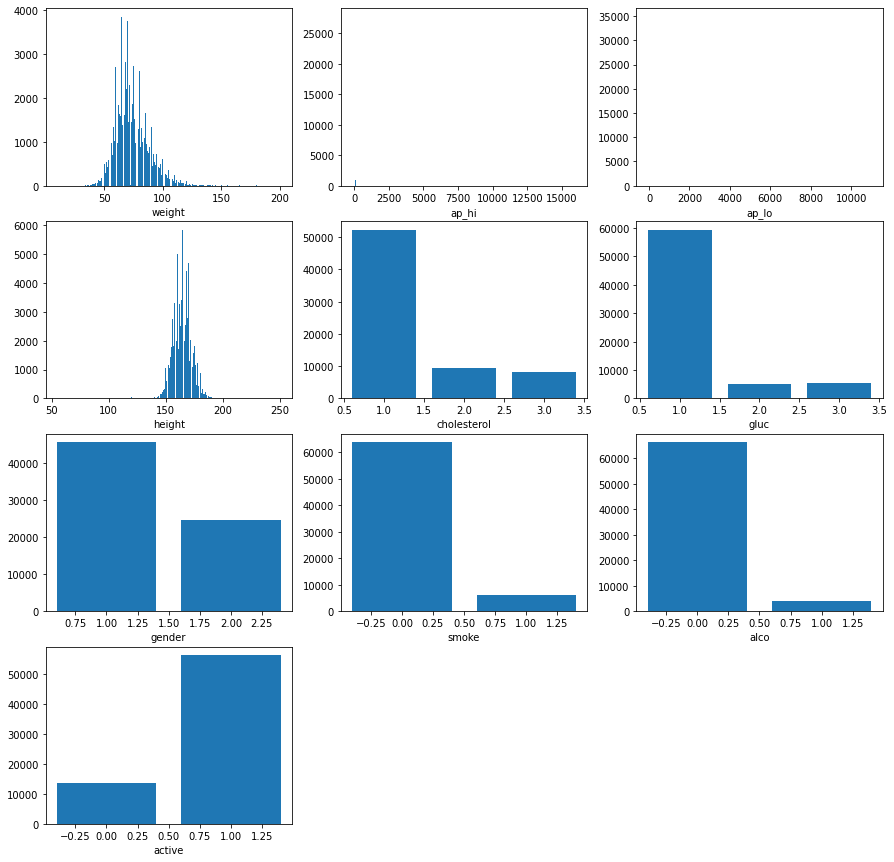

In [ ]:
# Cek distribusi tiap variabel
mpl.rcParams['figure.figsize'] = [15,15]
# plt.style.use('fivethirtyeight') 
# sns.set_style('whitegrid')
grid = mpl.gridspec.GridSpec(4, 3)

var_to_plot = safe_var

for i, var in enumerate(var_to_plot) :
    ax = plt.subplot(grid[i])
    z = df[var].value_counts()
    ax.bar(z.index, z.values)
    ax.set_xlabel(var)

**Predictive Power EDA**

In [ ]:
target_variance = pd.DataFrame([[sv, np.std(df_train.groupby(sv)['Response'].mean().sort_values(ascending=False))] for sv in safe_var])
target_variance.sort_values(by=1, ascending=False)

,0,1
1,Policy_Sales_Channel,0.139553
8,Vehicle_Damage,0.115254
7,Previously_Insured,0.111531
4,Vehicle_Age,0.102106
2,Age,0.069055
6,Driving_License,0.043918
3,Region_Code,0.034292
5,Gender,0.017073
0,Vintage,0.012746


In [ ]:
df_train['Policy_Sales_Channel'].value_counts().head()

152.0    67126
26.0     39992
124.0    37055
160.0    10890
156.0     5209
Name: Policy_Sales_Channel, dtype: int64

In [ ]:
df_train.groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending=False)

Policy_Sales_Channel
123.0    1.000000
101.0    1.000000
121.0    0.350000
62.0     0.333333
3.0      0.303846
           ...   
79.0     0.000000
27.0     0.000000
82.0     0.000000
83.0     0.000000
76.0     0.000000
Name: Response, Length: 146, dtype: float64

In [ ]:
Y_train.mean()

0.12146163292295098

In [ ]:
yyy = df_train['Policy_Sales_Channel'].value_counts().head()
zzz = df_train.groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending=False)
[[yy, zzz[yy]] for yy in yyy.index]

[[152.0, 0.02829008133957036],
 [26.0, 0.1959391878375675],
 [124.0, 0.18704628255296182],
 [160.0, 0.020110192837465565],
 [156.0, 0.22614705317719333]]

### **Bantu Analisis**

https://colab.research.google.com/drive/1p1T43pkgWwQb8S7SlKDapjAQ6G3a03UE?usp=sharing

In [ ]:
for col in X_train.columns:
    print(X_train[col].value_counts(), '\n------------------\n\n')

2047     1
64981    1
19939    1
17890    1
12074    1
        ..
97178    1
95131    1
19356    1
82845    1
71683    1
Name: id, Length: 35000, dtype: int64 
------------------


20457    22
18940    19
20347    19
21927    18
20367    18
         ..
14857     1
16934     1
14889     1
23141     1
14343     1
Name: age, Length: 7451, dtype: int64 
------------------


1    22751
2    12249
Name: gender, dtype: int64 
------------------


165    2921
160    2571
170    2278
168    2210
164    1691
       ... 
135       1
75        1
72        1
74        1
64        1
Name: height, Length: 92, dtype: int64 
------------------


65.0    1921
70.0    1899
68.0    1431
60.0    1389
80.0    1335
        ... 
23.0       1
82.5       1
60.6       1
65.3       1
66.5       1
Name: weight, Length: 221, dtype: int64 
------------------


 120     13944
 140      4696
 130      4435
 110      4294
 150      2188
         ...  
 907         1
 1130        1
 202         1
-120         1
 191    

### **Bagi Train-Val**

In [ ]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X_train, Y_train, test_size=0.5, random_state=42)

### **Label Encoding**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_tr.reset_index(drop=True, inplace=True)
Y_tr.reset_index(drop=True, inplace=True)

X_te.reset_index(drop=True, inplace=True)
Y_te.reset_index(drop=True, inplace=True)

In [ ]:
# Praproses (jika ada)
X_tr_factorized = X_tr.copy()
X_te_factorized = X_te.copy()

# Buat df untuk akses ke 'Response'
df_tr_factorized = pd.concat([X_tr_factorized, Y_tr], axis=1)
df_te_factorized = pd.concat([X_te_factorized, Y_te], axis=1)

In [ ]:
# Difaktorisasi
to_factorize_cols = ['Gender', 'Vehicle_Damage']
for col in to_factorize_cols:
    X_tr_factorized[col] = pd.factorize(X_tr[col], sort=True)[0]
    X_te_factorized[col] = pd.factorize(X_te[col], sort=True)[0]

# Post-proses
X_tr_factorized['Vehicle_Age'] = X_tr_factorized['Vehicle_Age'].replace({'< 1 Year':0,
                                                                         '1-2 Year':1,
                                                                         '> 2 Years':2})
X_te_factorized['Vehicle_Age'] = X_te_factorized['Vehicle_Age'].replace({'< 1 Year':0,
                                                                         '1-2 Year':1,
                                                                         '> 2 Years':2})

In [ ]:
# # Bulan jadi kategori numerik
# month_replace = {'January':1, 
#                  'February':2, 
#                  'March':3, 
#                  'April':4,
#                  'May':5,
#                  'June':6,
#                  'July':7,
#                  'August':8,
#                  'September':9,
#                  'October':10,
#                  'November':11,
#                  'December':12}
# X_tr_factorized['arrival_date_month'] = X_tr_factorized['arrival_date_month'].replace(month_replace)
# X_te_factorized['arrival_date_month'] = X_te_factorized['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
trainsumm = dataset_summary(X_tr)
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_tr_factorized = X_tr_factorized.drop(columns=to_delete)
X_te_factorized = X_te_factorized.drop(columns=to_delete)


# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Policy_Sales_Channel', 'Region_Code']
X_tr_factorized = X_tr_factorized.drop(columns=to_delete_unique)
X_te_factorized = X_te_factorized.drop(columns=to_delete_unique)

Dataset dimension : (95277, 11)


### **Mean Encoding (alpha)**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_tr.reset_index(drop=True, inplace=True)
Y_tr.reset_index(drop=True, inplace=True)

X_te.reset_index(drop=True, inplace=True)
Y_te.reset_index(drop=True, inplace=True)

In [ ]:
# Praproses (jika ada)
X_tr_encoded = X_tr.copy()
X_te_encoded = X_te.copy()

X_tr_encoded[~X_tr_encoded['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0
X_te_encoded[~X_te_encoded['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0

# Buat df untuk akses ke 'Response'
df_tr_encoded = pd.concat([X_tr_encoded, Y_tr], axis=1)
df_te_encoded = pd.concat([X_te_encoded, Y_te], axis=1)

In [ ]:
# Di mean encoding
to_mean_encode = ['Policy_Sales_Channel', 'Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in to_mean_encode:

    alpha = 10
    means_global = df_tr_encoded['Response'].mean()
    nrows_cat = df_tr_encoded.groupby(col)['Response'].count()
    means_cat = df_tr_encoded.groupby(col)['Response'].mean()
    means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

    X_tr_encoded[col] = X_tr_encoded[col].map(means_cats_adj)
    X_te_encoded[col] = X_te_encoded[col].map(means_cats_adj)

X_tr_encoded[to_mean_encode] = X_tr_encoded[to_mean_encode].astype('float64')
X_te_encoded[to_mean_encode] = X_te_encoded[to_mean_encode].astype('float64')

In [ ]:
# # Bulan jadi kategori numerik
# month_replace = {'January':1, 
#                  'February':2, 
#                  'March':3, 
#                  'April':4,
#                  'May':5,
#                  'June':6,
#                  'July':7,
#                  'August':8,
#                  'September':9,
#                  'October':10,
#                  'November':11,
#                  'December':12}
# X_tr_encoded['arrival_date_month'] = X_tr_encoded['arrival_date_month'].replace(month_replace)
# X_te_encoded['arrival_date_month'] = X_te_encoded['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_tr_encoded = X_tr_encoded.drop(columns=to_delete)
X_te_encoded = X_te_encoded.drop(columns=to_delete)


# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Region_Code']
X_tr_encoded = X_tr_encoded.drop(columns=to_delete_unique)
X_te_encoded = X_te_encoded.drop(columns=to_delete_unique)

### **Mean Encoding (alpha + CV)**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_tr.reset_index(drop=True, inplace=True)
Y_tr.reset_index(drop=True, inplace=True)

X_te.reset_index(drop=True, inplace=True)
Y_te.reset_index(drop=True, inplace=True)

In [ ]:
# Praproses (jika ada)
X_tr_encoded_cv = X_tr.copy()
X_te_encoded_cv = X_te.copy()

X_tr_encoded_cv[~X_tr_encoded_cv['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0
X_te_encoded_cv[~X_te_encoded_cv['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0

# Buat df untuk akses ke 'Response'
df_tr_encoded_cv = pd.concat([X_tr_encoded_cv, Y_tr], axis=1)
df_te_encoded_cv = pd.concat([X_te_encoded_cv, Y_te], axis=1)

In [ ]:
# Di mean encoding CV
to_mean_encode_cv = ['Policy_Sales_Channel', 'Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in to_mean_encode_cv:

    alpha = 10
    means_global = df_tr_encoded_cv['Response'].mean()
    nrows_cat = df_tr_encoded_cv.groupby(col)['Response'].count()
    means_cat = df_tr_encoded_cv.groupby(col)['Response'].mean()
    means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

    X_te_encoded_cv[col] = X_te_encoded_cv[col].map(means_cats_adj) # Test pake target global aja


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=28112020)     
    for tr_ind, val_ind in skf.split(X_tr_encoded_cv, Y_tr):

        # divide data
        df_for_estimation, df_estimated = df_tr_encoded_cv.loc[tr_ind], df_tr_encoded_cv.iloc[val_ind]

        # getting means on data for estimation (all folds except estimated)
        nrows_cat = df_for_estimation.groupby(col)['Response'].count()
        means_cat = df_for_estimation.groupby(col)['Response'].mean()
        means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

        # Mapping means to estimated fold
        X_tr_encoded_cv[col].loc[val_ind] = df_estimated[col].map(means_cats_adj)


X_tr_encoded_cv[to_mean_encode_cv] = X_tr_encoded_cv[to_mean_encode_cv].astype('float64')
X_te_encoded_cv[to_mean_encode_cv] = X_te_encoded_cv[to_mean_encode_cv].astype('float64')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
# # Bulan jadi kategori numerik
# month_replace = {'January':1, 
#                  'February':2, 
#                  'March':3, 
#                  'April':4,
#                  'May':5,
#                  'June':6,
#                  'July':7,
#                  'August':8,
#                  'September':9,
#                  'October':10,
#                  'November':11,
#                  'December':12}
# X_tr_encoded_cv['arrival_date_month'] = X_tr_encoded_cv['arrival_date_month'].replace(month_replace)
# X_te_encoded_cv['arrival_date_month'] = X_te_encoded_cv['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_tr_encoded_cv = X_tr_encoded_cv.drop(columns=to_delete)
X_te_encoded_cv = X_te_encoded_cv.drop(columns=to_delete)


# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Region_Code']
X_tr_encoded_cv = X_tr_encoded_cv.drop(columns=to_delete_unique)
X_te_encoded_cv = X_te_encoded_cv.drop(columns=to_delete_unique)

### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.model_selection import StratifiedKFold # Classifier
from sklearn.model_selection import KFold # Regressor

#Metrics
from sklearn.metrics import matthews_corrcoef # Classifier
from sklearn.metrics import mean_squared_error # Regressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### **Validation**

**Validation (Label Encoding)**

In [ ]:
#@title
X_tr_factorized.reset_index(drop=True, inplace=True)
Y_tr.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_tr = {}
rand_scores_val = {}

for r in rand_states:
    scores_tr = []
    scores_val = []

    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Classification
    # kf = KFold(n_splits=2) # Regression

    for train_index, val_index in skf.split(X_tr_factorized, Y_tr): # Classification
    # for train_index, val_index in kf.split(X_tr_factorized): # Regression
        model = XGBClassifier(random_state=1234) # Classification
        # model = XGBRegressor(random_state=1234) # Regression
        model.fit(X_tr_factorized.loc[train_index], Y_tr.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_tr_factorized.loc[train_index])
        Y_pred = model.predict(X_tr_factorized.loc[val_index])
        scores_tr.append(mean_squared_error(Y_tr.loc[train_index], Y_predtrain, squared=False))
        scores_val.append(mean_squared_error(Y_tr.loc[val_index], Y_pred, squared=False))

    rand_scores_tr[r] = scores_tr
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_tr)
    print(r, "Val  ", scores_val)
    print('----Baseline----')

print("Train: ", np.array(list(rand_scores_tr.values())).mean())
print("Val  : ",np.array(list(rand_scores_val.values())).mean())

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_tr_factorized, Y_tr)

Y_predtrain = model.predict(X_tr_factorized)
Y_pred = model.predict(X_te_factorized)

scores_tr = matthews_corrcoef(Y_tr, Y_predtrain)
scores_val = matthews_corrcoef(Y_te, Y_pred)

print('----Baseline----')

print("Train: ", scores_tr)
print("Val  : ", scores_val)

----Baseline----
Train:  0.019440807344107542
Val  :  -0.002081903506589686


**Validation (Mean Encoding + alpha)**

In [ ]:
#@title
X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_train = {}
rand_scores_val = {}

for r in rand_states:
    scores_train = []
    scores_val = []

    # skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Classification
    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Regression
    kf = KFold(n_splits=2)

    # for train_index, test_index in skf.split(X_train_encoded, Y_train):
    for train_index, test_index in kf.split(X_train_encoded):
        model = XGBRegressor(random_state=1234)
        model.fit(X_train_encoded.loc[train_index], Y_train.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_train_encoded.loc[train_index])
        Y_pred = model.predict(X_train_encoded.loc[test_index])
        scores_train.append(mean_squared_error(Y_train.loc[train_index], Y_predtrain, squared=False))
        scores_val.append(mean_squared_error(Y_train.loc[test_index], Y_pred, squared=False))

    rand_scores_train[r] = scores_train
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_train)
    print(r, "Test ", scores_val)
    print('----Baseline----')

print("Train: ", np.array(list(rand_scores_train.values())).mean())
print("Test : ",np.array(list(rand_scores_val.values())).mean())

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_tr_encoded, Y_tr)

Y_predtrain = model.predict(X_tr_encoded)
Y_pred = model.predict(X_te_encoded)

scores_tr = matthews_corrcoef(Y_tr, Y_predtrain)
scores_val = matthews_corrcoef(Y_te, Y_pred)

print('----Mean Encoding + Alpha----')

print("Train: ", scores_tr)
print("Val  : ", scores_val)

----Mean Encoding + Alpha----
Train:  0.01725417135141857
Val  :  0.0053246641737706045


**Validation (Mean Encoding CV + alpha)**

In [ ]:
#@title
X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_train = {}
rand_scores_val = {}

for r in rand_states:
    scores_train = []
    scores_val = []

    # skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Classification
    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Regression
    kf = KFold(n_splits=2)

    # for train_index, test_index in skf.split(X_train_encoded_cv, Y_train):
    for train_index, test_index in kf.split(X_train_encoded_cv):
        model = XGBRegressor(random_state=1234)
        model.fit(X_train_encoded_cv.loc[train_index], Y_train.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_train_encoded_cv.loc[train_index])
        Y_pred = model.predict(X_train_encoded_cv.loc[test_index])
        scores_train.append(mean_squared_error(Y_train.loc[train_index], Y_predtrain, squared=False))
        scores_val.append(mean_squared_error(Y_train.loc[test_index], Y_pred, squared=False))

    rand_scores_train[r] = scores_train
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_train)
    print(r, "Test ", scores_val)
    print('----Baseline----')

print("Train: ", np.array(list(rand_scores_train.values())).mean())
print("Test : ",np.array(list(rand_scores_val.values())).mean())

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_tr_encoded_cv, Y_tr)

Y_predtrain = model.predict(X_tr_encoded_cv)
Y_pred = model.predict(X_te_encoded_cv)

scores_tr = matthews_corrcoef(Y_tr, Y_predtrain)
scores_val = matthews_corrcoef(Y_te, Y_pred)

print('----Mean Encoding + CV + Alpha----')

print("Train: ", scores_tr)
print("Val  : ", scores_val)

----Mean Encoding + CV + Alpha----
Train:  0.019879790066312127
Val  :  0.0053246641737706045


### **Submit**

In [ ]:
X_train_factorized.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_factorized, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_factorized)
Y_pred.to_csv('')

Baseline: 0.6645578040144313
Mean Encoding: 0.6747142800755542
Mean Encoding CV: 0.6768000304800589


In [ ]:
X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_encoded, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded)
Y_pred.to_csv('')

In [ ]:
X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_encoded_cv, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded_cv)
Y_pred.to_csv('')

### **Test**

**Test (Label Encoding)**

In [ ]:
# Praproses (jika ada)
X_train_factorized = X_train.copy()
X_test_factorized = X_test.copy()

# Buat df untuk akses ke 'Response'
df_train_factorized = pd.concat([X_train_factorized, Y_train], axis=1)
df_test_factorized = pd.concat([X_test_factorized, Y_test], axis=1)


# Difaktorisasi
to_factorize_cols = ['Gender', 'Vehicle_Damage']
for col in to_factorize_cols:
    X_train_factorized[col] = pd.factorize(X_train[col], sort=True)[0]
    X_test_factorized[col] = pd.factorize(X_test[col], sort=True)[0]

# Post-proses
X_train_factorized['Vehicle_Age'] = X_train_factorized['Vehicle_Age'].replace({'< 1 Year':0,
                                                                         '1-2 Year':1,
                                                                         '> 2 Years':2})
X_test_factorized['Vehicle_Age'] = X_test_factorized['Vehicle_Age'].replace({'< 1 Year':0,
                                                                         '1-2 Year':1,
                                                                         '> 2 Years':2})


# Hapus kolom yg missing > 30%
trainsumm = dataset_summary(X_train)
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_factorized = X_train_factorized.drop(columns=to_delete)
X_test_factorized = X_test_factorized.drop(columns=to_delete)

# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Policy_Sales_Channel', 'Region_Code']
X_train_factorized = X_train_factorized.drop(columns=to_delete_unique)
X_test_factorized = X_test_factorized.drop(columns=to_delete_unique)

Dataset dimension : (190554, 11)


In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_train_factorized, Y_train)

Y_predtrain = model.predict(X_train_factorized)
Y_pred = model.predict(X_test_factorized)

scores_train = matthews_corrcoef(Y_train, Y_predtrain)
scores_val = matthews_corrcoef(Y_test, Y_pred)

print('----Label Encoding----')

print("Train: ", scores_train)
print("Val  : ", scores_val)

----Mean Encoding + CV + Alpha----
Train:  0.0
Val  :  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


**Test (Mean Encode + Alpha)**

In [ ]:
# Praproses (jika ada)
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded[~X_train_encoded['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0
X_test_encoded[~X_test_encoded['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0

# Buat df untuk akses ke 'Response'
df_train_encoded = pd.concat([X_train_encoded, Y_train], axis=1)
df_test_encoded = pd.concat([X_test_encoded, Y_test], axis=1)


# Di mean encoding
to_mean_encode = ['Policy_Sales_Channel', 'Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in to_mean_encode:

    alpha = 10
    means_global = df_train_encoded['Response'].mean()
    nrows_cat = df_train_encoded.groupby(col)['Response'].count()
    means_cat = df_train_encoded.groupby(col)['Response'].mean()
    means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

    X_train_encoded[col] = X_train_encoded[col].map(means_cats_adj)
    X_test_encoded[col] = X_test_encoded[col].map(means_cats_adj)

X_train_encoded[to_mean_encode] = X_train_encoded[to_mean_encode].astype('float64')
X_test_encoded[to_mean_encode] = X_test_encoded[to_mean_encode].astype('float64')


# Hapus kolom yg missing > 30%
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_encoded = X_train_encoded.drop(columns=to_delete)
X_test_encoded = X_test_encoded.drop(columns=to_delete)

# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Region_Code']
X_train_encoded = X_train_encoded.drop(columns=to_delete_unique)
X_test_encoded = X_test_encoded.drop(columns=to_delete_unique)

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_train_encoded, Y_train)

Y_predtrain = model.predict(X_train_encoded)
Y_pred = model.predict(X_test_encoded)

scores_train = matthews_corrcoef(Y_train, Y_predtrain)
scores_val = matthews_corrcoef(Y_test, Y_pred)

print('----Mean Encoding + Alpha----')

print("Train: ", scores_train)
print("Val  : ", scores_val)

----Mean Encoding + CV + Alpha----
Train:  0.010544196449169799
Val  :  0.017107671153308964


**Test (Mean Encode + Alpha + CV)**

In [ ]:
# Praproses (jika ada)
X_train_encoded_cv = X_train.copy()
X_test_encoded_cv = X_test.copy()

X_train_encoded_cv[~X_train_encoded_cv['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0
X_test_encoded_cv[~X_test_encoded_cv['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0

# Buat df untuk akses ke 'Response'
df_train_encoded_cv = pd.concat([X_train_encoded_cv, Y_train], axis=1)
df_test_encoded_cv = pd.concat([X_test_encoded_cv, Y_test], axis=1)


# Di mean encoding CV
to_mean_encode_cv = ['Policy_Sales_Channel', 'Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in to_mean_encode_cv:

    alpha = 10
    means_global = df_train_encoded_cv['Response'].mean()
    nrows_cat = df_train_encoded_cv.groupby(col)['Response'].count()
    means_cat = df_train_encoded_cv.groupby(col)['Response'].mean()
    means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

    X_test_encoded_cv[col] = X_test_encoded_cv[col].map(means_cats_adj) # Test pake target global aja


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=28112020)     
    for tr_ind, val_ind in skf.split(X_train_encoded_cv, Y_train):

        # divide data
        df_for_estimation, df_estimated = df_train_encoded_cv.loc[tr_ind], df_train_encoded_cv.iloc[val_ind]

        # getting means on data for estimation (all folds except estimated)
        nrows_cat = df_for_estimation.groupby(col)['Response'].count()
        means_cat = df_for_estimation.groupby(col)['Response'].mean()
        means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

        # Mapping means to estimated fold
        X_train_encoded_cv[col].loc[val_ind] = df_estimated[col].map(means_cats_adj)


X_train_encoded_cv[to_mean_encode_cv] = X_train_encoded_cv[to_mean_encode_cv].astype('float64')
X_test_encoded_cv[to_mean_encode_cv] = X_test_encoded_cv[to_mean_encode_cv].astype('float64')


# Hapus kolom yg missing > 30%
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_encoded_cv = X_train_encoded_cv.drop(columns=to_delete)
X_test_encoded_cv = X_test_encoded_cv.drop(columns=to_delete)


# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Region_Code']
X_train_encoded_cv = X_train_encoded_cv.drop(columns=to_delete_unique)
X_test_encoded_cv = X_test_encoded_cv.drop(columns=to_delete_unique)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_train_encoded_cv, Y_train)

Y_predtrain = model.predict(X_train_encoded_cv)
Y_pred = model.predict(X_test_encoded_cv)

scores_train = matthews_corrcoef(Y_train, Y_predtrain)
scores_val = matthews_corrcoef(Y_test, Y_pred)

print('----Mean Encoding + Alpha----')

print("Train: ", scores_train)
print("Val  : ", scores_val)

----Mean Encoding + Alpha----
Train:  0.006795195606424971
Val  :  0.0037035909231529517


In [ ]:
X_train_factorized.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBRegressor(random_state=1234)
model.fit(X_train_factorized, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_factorized)
print("Baseline:", mean_squared_error(Y_test, Y_pred, squared=False))



X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBRegressor(random_state=1234)
model.fit(X_train_encoded, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded)
print("Mean Encoding:", mean_squared_error(Y_test, Y_pred, squared=False))



X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBRegressor(random_state=1234)
model.fit(X_train_encoded_cv, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded_cv)
print("Mean Encoding CV:", mean_squared_error(Y_test, Y_pred, squared=False))

[15:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Baseline: 517.1187877608266
[15:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Encoding: 502.62569150384604
[15:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Encoding CV: 500.7945022102557
